$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$
# Tutorial

In [1]:
import komoog.komoot as komoot
import komoog.audio as audio
import matplotlib.pyplot as pl

## Download komoot tours

In [2]:
tours = komoot.download_all_komoot_tours()

In [3]:
for i, tour in enumerate(tours):
    print(i, tour['name'])

0 Colorado Provencale in Rustrel – La Doa Loop from Rustrel
1 Lookout – L´Aiguebrun Loop from Buoux
2 Gorges de Régalon – Vue de la Gorge Loop from Quartier Gardet
3 Forêt des Cèdres - Vue au sud – Belvédère Loop from Lacoste
4 Crête du Grand luberon – Le Mourre Nègre (1125m) Loop from Rue de l'Église
5 Beautiful Cliffs – Gorges d'Oppedette Loop from D 201
6 Beautiful Cliffs – Gorges d'Oppedette Loop from D 201
7 Chateau des Eveques Loop from Fontaine-de-Vaucluse
8 Valescure vaucluse Loop from Fontaine-de-Vaucluse
9 Colorado Provencale in Rustrel – Aussicht auf die Sahara Loop from Rustrel
10 Chateau des Eveques – Belle vue Loop from Fontaine-de-Vaucluse
11 Porte de Saignon – Ortskern Saignon Loop from Apt
12 Ortskern Saignon – Porte de Saignon Loop from Apt
13 Möllensee und Kiessee


## Load komoot tours from harddrive

Tours are saved in `~/.komoog/`.

In [4]:
import komoog.io as io
tours = io.read_tours()

## Plot elevation profile

Text(0, 0.5, 'elevation [m]')

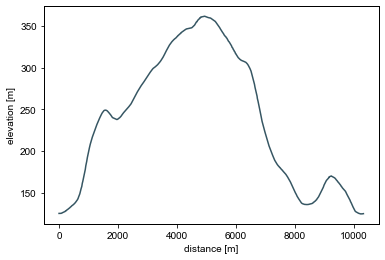

In [5]:
import komoog.gpx as gpx

gpx_tracks = gpx.convert_tour_to_gpx_tracks(tours[2])
distance, elevation = gpx.convert_gpx_tracks_to_arrays(gpx_tracks)

pl.plot(distance, elevation)
pl.xlabel('distance [m]')
pl.ylabel('elevation [m]')

## Convert elevation profile to signal

This will normalize the profile to the correct ranges and remove
duplicates

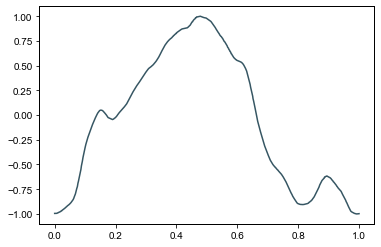

In [6]:
x, y = audio.convert_distance_and_elevation_to_signal(distance, elevation)

pl.plot(x,y )


By default, signals will be maximized. If you don’t want them maximized,
define a maximum elevation difference that will correspond to the range
\[-1,1\] instead, e.g. 2000 meters.

(-1.0, 1.0)

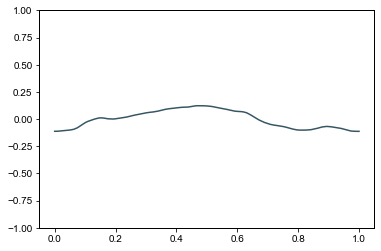

In [7]:
x, y = audio.convert_distance_and_elevation_to_signal(distance,
                                                      elevation,
                                                      max_elevation_difference=2000)

pl.plot(x,y)
pl.ylim(-1,1)


## Convert signal to audio

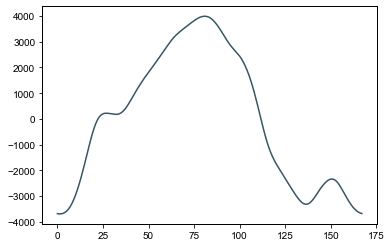

In [8]:
# approximate_length_in_seconds = 0 will give a single loop of the signal
audio_data, sampling_rate = audio.convert_signal_to_audio(x,
                                                     y,
                                                     approximate_length_in_seconds=0
                                                    )
pl.plot(audio_data)

## Loop wave

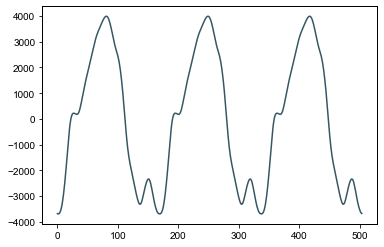

In [9]:
audio_data, sampling_rate = audio.convert_signal_to_audio(
                                                     x,
                                                     y,
                                                     approximate_length_in_seconds=1/100
                                                    )
pl.plot(audio_data)


## Generate longer audio data and play it

In [10]:
audio_data, sampling_rate = audio.convert_signal_to_audio(x,y,)
audio.play_audio(audio_data, sampling_rate)

You should’ve heard a sound now. Note that by default, a sound length of
1s is produced.

## Tune to different notes

In [11]:
audio_data, sampling_rate = audio.convert_signal_to_audio(
                                                     x,
                                                     y,
                                                     tune='A'
                                                    )
audio.play_audio(audio_data, sampling_rate)

These are the tunes that work:

In [12]:
audio._NOTES

{'C': -9,
 'C#': -8,
 'Db': -8,
 'D': -7,
 'D#': -6,
 'Eb': -6,
 'E': -5,
 'F': -4,
 'F#': -3,
 'Gb': -3,
 'G': -2,
 'G#': -1,
 'Ab': -1,
 'A': 0,
 'A#': 1,
 'Bb': 1,
 'B': 2}

You can also tune to a specific frequency, e.g. 200 Hz.

In [13]:
audio_data, sampling_rate = audio.convert_signal_to_audio(
                                                     x,
                                                     y,
                                                     tune=220,
                                                    )
audio.play_audio(audio_data, sampling_rate)

## Change sampling rate

In [14]:
audio_data, sampling_rate = audio.convert_signal_to_audio(
                                                     x,
                                                     y,
                                                     sampling_rate=48000,
                                                    )
audio.play_audio(audio_data, sampling_rate)

## Write .wav file

In [15]:
io.write_wav('./example.wav',audio_data,sampling_rate)

## Converting tours to sound without going through all the hassle

In [16]:
audio_data, sampling_rate = audio.convert_tour_to_audio(
                                     tours[2],
                                     max_elevation_difference=1000,
                                     sampling_rate=48000,
                                     tune='A',
                                     approximate_length_in_seconds=3,
                                    )
audio.play_audio(audio_data, sampling_rate)

## Make the frequency of the sound follow the elevation profile

In [17]:
audio_data, sampling_rate = audio.convert_tour_to_audio(
                                     tours[2],
                                     max_elevation_difference=1000,
                                     sampling_rate=48000,
                                     tune='A#',
                                     approximate_length_in_seconds=3,
                                     set_tune_to_follow_tour_profile=True,
                                    )
audio.play_audio(audio_data, sampling_rate)

## Interactive conversion without downloading all tours previously

In [18]:
tour = komoot.choose_komoot_tour_live()

audio_data, sampling_rate = audio.convert_tour_to_audio(tour)
audio.play_audio(audio_data, sampling_rate)

(1) Colorado Provencale in Rustrel – La Doa Loop from Rustrel
(2) Lookout – L´Aiguebrun Loop from Buoux
(3) Gorges de Régalon – Vue de la Gorge Loop from Quartier Gardet
(4) Forêt des Cèdres - Vue au sud – Belvédère Loop from Lacoste
(5) Crête du Grand luberon – Le Mourre Nègre (1125m) Loop from Rue de l'Église
(6) Beautiful Cliffs – Gorges d'Oppedette Loop from D 201
(7) Beautiful Cliffs – Gorges d'Oppedette Loop from D 201
(8) Chateau des Eveques Loop from Fontaine-de-Vaucluse
(9) Valescure vaucluse Loop from Fontaine-de-Vaucluse
(10) Colorado Provencale in Rustrel – Aussicht auf die Sahara Loop from Rustrel
(11) Chateau des Eveques – Belle vue Loop from Fontaine-de-Vaucluse
(12) Porte de Saignon – Ortskern Saignon Loop from Apt
(13) Ortskern Saignon – Porte de Saignon Loop from Apt
(14) Möllensee und Kiessee
Tour ID: 5


## Play some melodies

In [19]:
notes = ['C','D','E','F','G','F','E','D','C']
durations = [0.25]* 8 + [0.5]

In [20]:
import numpy as np

audios = []
for dur, note in zip(durations, notes):
    audio_data, sampling_rate = audio.convert_tour_to_audio(
                                         tours[2],
                                         max_elevation_difference=1000,
                                         tune=note,
                                         approximate_length_in_seconds=dur,
                                        )
    audios.append(audio_data)
audio.play_audio(np.concatenate(audios).astype(np.int16), sampling_rate)

In [21]:
# with pauses
durations = ([0.25]*6+[0.5])*2 #seconds
notes = ['C','C','G','G','A','A','G','F','F','E','E','D','D','C']

In [23]:
pause = np.zeros((1000,))

audios = []
for dur, note in zip(durations, notes):
    audio_data, sampling_rate = audio.convert_tour_to_audio(
                                         tours[2],
                                         max_elevation_difference=1000,
                                         tune=note,
                                         approximate_length_in_seconds=dur,
                                        )
    audios.extend([audio_data,pause])
audios = np.concatenate(audios).astype(np.int16)
audio.play_audio(audios, sampling_rate)
io.write_wav('twinkle.wav',audios,sampling_rate)